In [1]:
import pandas as pd
df = pd.read_csv('../Data/results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
#converting the date to datetime format
df['date'] = pd.to_datetime(df['date'])
df.columns = [col.lower().strip().replace(" ", "_") for col in df.columns]
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [5]:
df.to_csv('../Data/cleaned_results.csv', index=False)

Total matches in the dataset: 48207


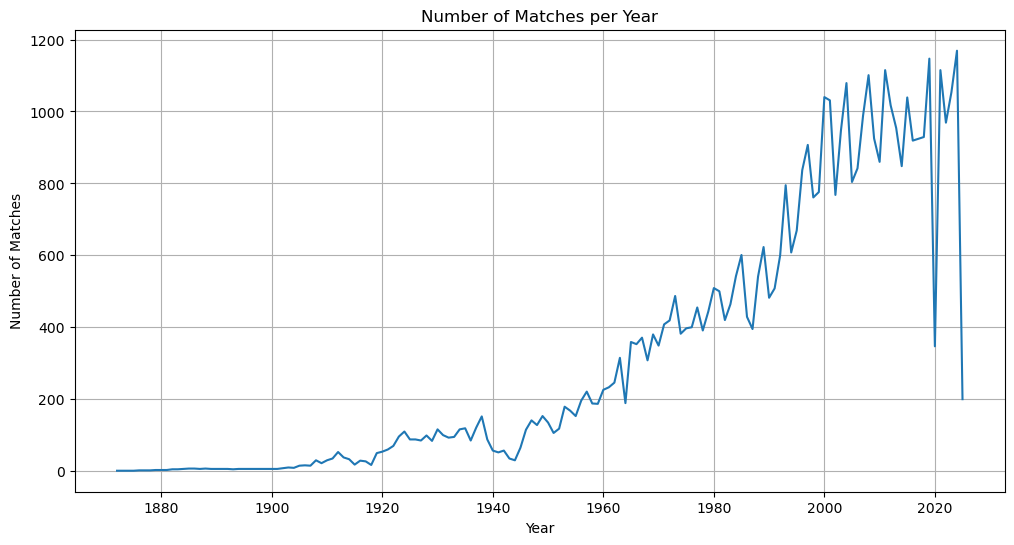

In [7]:
total_matches = len(df)
print("Total matches in the dataset:", total_matches)
df['year'] = df['date'].dt.year
matches_per_year = df['year'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
matches_per_year.plot(kind='line')
plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

Average goals per match: 2.94


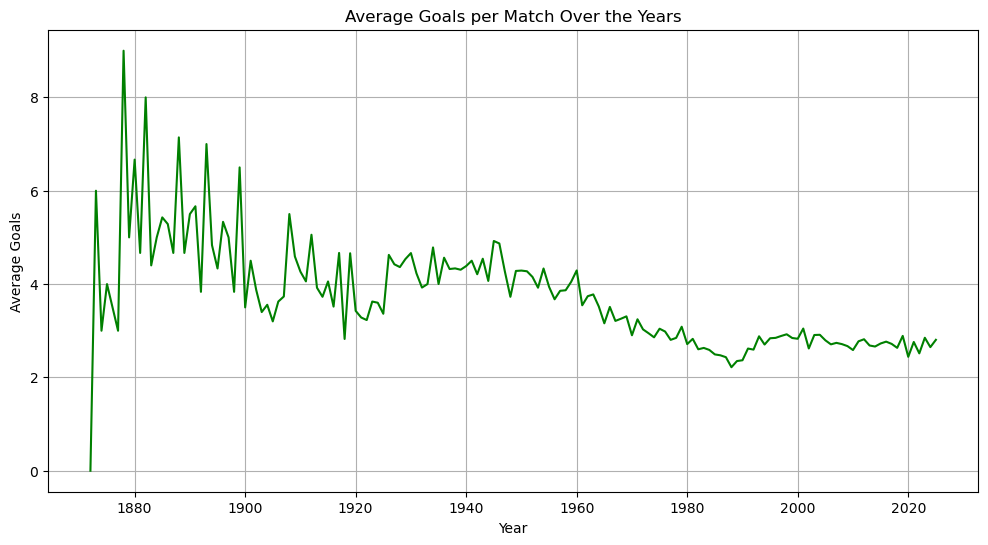

In [9]:
df['total_goals'] = df['home_score'] + df['away_score']
average_goals = df['total_goals'].mean()
print("Average goals per match:", round(average_goals, 2))

avg_goals_per_year = df.groupby('year')['total_goals'].mean()

plt.figure(figsize=(12, 6))
avg_goals_per_year.plot(kind='line', color='green')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.grid(True)
plt.show()

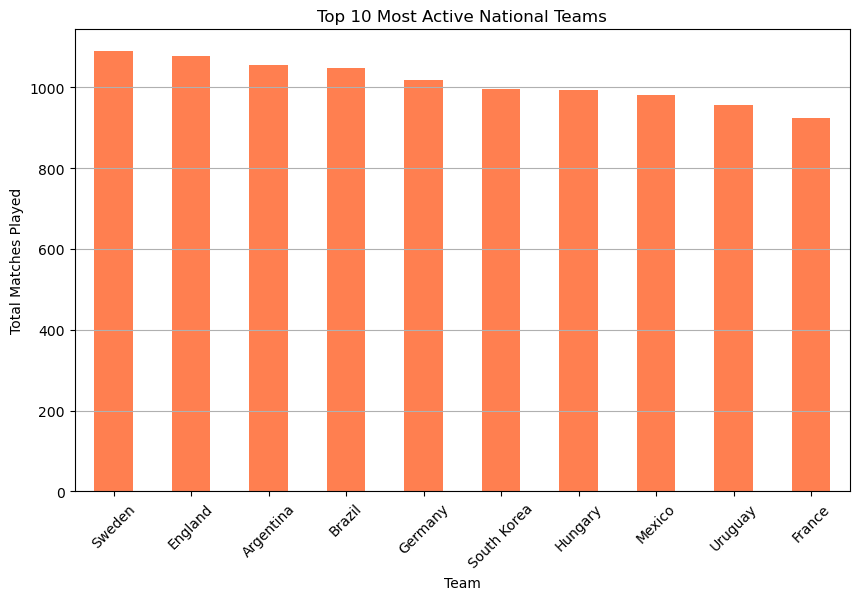

In [11]:
home_counts = df['home_team'].value_counts()
away_counts = df['away_team'].value_counts()


total_matches = home_counts.add(away_counts, fill_value=0)
top_10_teams = total_matches.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_10_teams.plot(kind='bar', color='coral')
plt.title('Top 10 Most Active National Teams')
plt.xlabel('Team')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

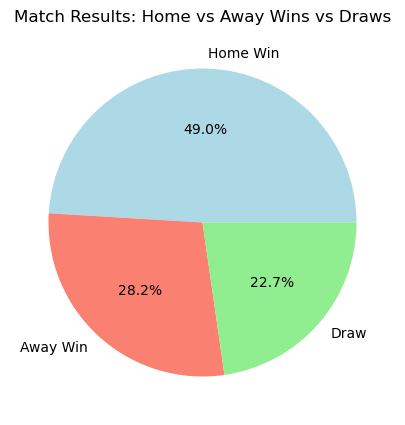

In [13]:
def get_result(row):
    if row['home_score'] > row['away_score']:
        return 'Home Win'
    elif row['home_score'] < row['away_score']:
        return 'Away Win'
    else:
        return 'Draw'

df['result'] = df.apply(get_result, axis=1)
result_counts = df['result'].value_counts()
plt.figure(figsize=(7, 5))
result_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen'])
plt.title('Match Results: Home vs Away Wins vs Draws')
plt.ylabel('')
plt.show()

In [15]:
df.to_csv('../Data/enriched_results_for_tableau.csv', index=False)